# Chapter 4: Functional Programming: Rudimentary Statistics and Analysis

In [ ]:
def function_name(object1, object2, ..., objectn):
    <operations>

In [8]:
n = 0
total = 0
values = [i for i in range(10)]

print("total\t", "value")
for value in values:
    total += value
    print(total, "\t", value)
    
print("final total:", total)

total	 value
0 	 0
1 	 1
3 	 2
6 	 3
10 	 4
15 	 5
21 	 6
28 	 7
36 	 8
45 	 9
final total: 45


In [9]:
# Bad Practice to copy and paste old code
total = 0
values = [i for i in range(0,1000,2)]
print("total\t", "value")
for value in values:
    total += value
    print(total, "\t", value)

total	 value
0 	 0
2 	 2
6 	 4
12 	 6
20 	 8
30 	 10
42 	 12
56 	 14
72 	 16
90 	 18
110 	 20
132 	 22
156 	 24
182 	 26
210 	 28
240 	 30
272 	 32
306 	 34
342 	 36
380 	 38
420 	 40
462 	 42
506 	 44
552 	 46
600 	 48
650 	 50
702 	 52
756 	 54
812 	 56
870 	 58
930 	 60
992 	 62
1056 	 64
1122 	 66
1190 	 68
1260 	 70
1332 	 72
1406 	 74
1482 	 76
1560 	 78
1640 	 80
1722 	 82
1806 	 84
1892 	 86
1980 	 88
2070 	 90
2162 	 92
2256 	 94
2352 	 96
2450 	 98
2550 	 100
2652 	 102
2756 	 104
2862 	 106
2970 	 108
3080 	 110
3192 	 112
3306 	 114
3422 	 116
3540 	 118
3660 	 120
3782 	 122
3906 	 124
4032 	 126
4160 	 128
4290 	 130
4422 	 132
4556 	 134
4692 	 136
4830 	 138
4970 	 140
5112 	 142
5256 	 144
5402 	 146
5550 	 148
5700 	 150
5852 	 152
6006 	 154
6162 	 156
6320 	 158
6480 	 160
6642 	 162
6806 	 164
6972 	 166
7140 	 168
7310 	 170
7482 	 172
7656 	 174
7832 	 176
8010 	 178
8190 	 180
8372 	 182
8556 	 184
8742 	 186
8930 	 188
9120 	 190
9312 	 192
9506 	 194
9702 	 19

In [13]:
def total(list):
    total_ = 0
    # in original he used the index of the list 
    # n = len(list)
    # for i in range(n)
    for val in list:
        total_ += val
    return total_
total(values)

249500

In [12]:
total([i for i in range(-1000, 10000, 53)])

932984

In [17]:
import random
X1 = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
X2 = [random.randint(0,100) for i in range(10)]
total(X1), total(X2)

(165, 416)

### Mean

In [18]:
def mean(list):
    n = len(list)
    mean_ = total(list) / n
    return mean_
mean(X1), mean(X2)

(16.5, 41.6)

Now lets build the rest of the summary statistical fuctions

1. median
2. mode
3. variance
4. standard variation
5. standard error
6. covariance
7. correlation

### Median

In [33]:
def median(list):
    n = len(list)
    list = sorted(list)
    
    
    ## two cases: 
    ## lists of odds lengths
    ## i % j checks for remainder after dividing i by j
    if n % 2!= 0:
        middle_index = int((n - 1) / 2)
        median_ = list[middle_index]
    
    ## list of even lengths
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(list[lower_middle_index: upper_middle_index + 1])
    return median_

print(X1)
median(X1)

[3, 6, 9, 12, 15, 18, 21, 24, 27, 30]


16.5

In [34]:
# this shows what would happen with an odd list
median(X1[:-1])

15

In [20]:
sorted(X2)

[0, 4, 20, 21, 23, 62, 64, 65, 65, 92]

### Mode

In [42]:
def mode(list):
    count_dct = {}
# create entries with 0
    for key in list:
        count_dct[key] = 0
# add up each occurance
    for key in list:
        count_dct[key] += 1
# calculate max count up front
    max_count = max(count_dct.values())
    mode_ = []
# now we can compare each count to the max count
    for key, count in count_dct.items():
        if count == max_count:
            mode_.append(key)
            
    
    return mode_


list = [1,1,1,1,1,2,3,4,5,5,5,5,5,1000,1000]
mode(list)

[1, 5]

## Variance

**********

In [47]:
def variance(list, sample = True):
    list_mean = mean(list)
    n = len(list)
    DoF = n - 1
    sum_sq_diff = 0
    
    for val in list:
        diff = val - list_mean
        sum_sq_diff += (diff) ** 2
        ## print(val, list_mean, diff ** 2, sum_sq_diff)
    if sample == False:
        variance_ = sum_sq_diff / n
    else:
        variance_ = sum_sq_diff / DoF
    return variance_

variance(X1, sample = True), variance(X1, sample = False)

(82.5, 74.25)

In [48]:
variance(X2, sample = True), variance(X2, sample = False)

(992.7111111111111, 893.4399999999999)

In [49]:
def SD(list, sample = True):
    SD_ = variance(list, sample) ** (1/2)
    return SD_
SD(X1, sample = True), SD(X1, sample = False)

(9.082951062292475, 8.616843969807043)

In [50]:
SD(X2, sample = True), SD(X2, sample = False)

(31.50731837384945, 29.890466707631045)

### Standard Error

In [53]:
def STE(list, sample = True):
    n = len(list)
    se = SD(list, sample) / n ** (1/2)
    
    return se

In [54]:
SD(X1, sample = True), STE(X1, sample = True)

(9.082951062292475, 2.872281323269014)

In [55]:
SD(X2, sample = True), STE(X2, sample = True)

(31.50731837384945, 9.963488902543682)

### Covariance

In [62]:
def covariance(list1, list2, sample = True):
    mean1 = mean(list1)
    mean2 = mean(list2)
    
    cov = 0
    n1 = len(list1)
    n2 = len(list2)
    if n1 == n2:
        n = n1
        # sum the product of the differences
        for i in range(n):
            cov += (list1[i] - mean1) * (list2[i] - mean2)
        if sample == False:
            cov = cov / n
        else:
            cov = cov / (n - 1)
    else:
        print("List Lengths are not equal")
        print("List 1", n1)
        print("List 2", n2)
    
    return cov
covariance(X1, X2, sample = True)

-110.33333333333331

In [63]:
covariance(X1[:-1], X2)

List Lengths are not equal
List 1 9
List 2 10


0

In [64]:
def correlation(list1, list2):
    cov = covariance(list1, list2)
    SD1 = SD(list1)
    SD2 = SD(list2)
    corr = cov / (SD1 * SD2)
    
    return corr
correlation(X1, X2)

-0.385539006031148

In [65]:
X3 = [x * -0.5 for x in X1]
correlation(X1, X3)

-1.0

In [66]:
print(X1, X2)

[3, 6, 9, 12, 15, 18, 21, 24, 27, 30] [92, 64, 23, 65, 0, 20, 62, 21, 4, 65]


In [69]:
def skewness(list, sample = True):
    mean_ = mean(list)
    SD_ = SD(list, sample)
    skew = 0
    n = len(list)
    for val in list:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ ** 3) if not sample else\
        n * skew / ((n - 1) / (n - 2) * SD_ ** 3)
    return skew

skewness(X1)

0.0

In [70]:
skewness(X2)

6.5295922760650384

In [87]:
def kurtosis(list, sample = True):
    mean_ = mean(list)
    kurt = 0 
    SD_ = SD(list, sample)
    n = len(list)
    for val in list:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else n * (n + 1) * kurt / \
        ((n - 1) * (n - 2) * (n - 3) * (SD_ ** 4) - (3 *(n - 1) ** 2))
    
    return kurt

kurtosis(X1, sample = False)

1.7757575757575759

In [85]:
kurtosis(X2, sample = False)

1.627091225678823

### Gather Statistics

In [83]:
import pandas as pd
def gather_statistics(df, sample = False, round_dig = 2):
    dct = {key:{} for key in df}
    for key, val in df.items():
        val.dropna(inplace = True)
        dct[key]["mean"] = round(mean(val), round_dig)
        dct[key]["median"] = round(median(val), round_dig)
        dct[key]["variance"] = round(variance(val), round_dig)
        dct[key]["S.D."] = round(SD(val, sample), round_dig)
        dct[key]["skewness"] = round(skewness(val, sample), round_dig)
        dct[key]["kurtosis"] = round(kurtosis(val, sample), round_dig)
    stats_df = pd.DataFrame(dct)
    return(stats_df)
data = pd.DataFrame([X1,X2], index = ["List1", "List2"]).T
gather_statistics(data, sample = False, round_dig = 2)

List1   List2
mean      16.50   41.60
median    16.50   42.50
variance  82.50  992.71
S.D.       8.62   29.89
skewness   0.00    0.09
kurtosis   1.78    1.63

## Fraser Economic Freedom of the World 

In [96]:
filename = "fraser.xlsx"
data = pd.read_excel(filename, header = [4],
                    index_col = [3,1])
data

Unnamed: 0 ISO Code 2      Countries  \
ISO Code 3 Year                                         
ALB        2020         NaN         AL        Albania   
DZA        2020         NaN         DZ        Algeria   
AGO        2020         NaN         AO         Angola   
ARG        2020         NaN         AR      Argentina   
ARM        2020         NaN         AM        Armenia   
...                     ...        ...            ...   
VEN        1970         NaN         VE  Venezuela, RB   
VNM        1970         NaN         VN        Vietnam   
YEM        1970         NaN         YE    Yemen, Rep.   
ZMB        1970         NaN         ZM         Zambia   
ZWE        1970         NaN         ZW       Zimbabwe   

                 Economic Freedom Summary Index   Rank  Quartile  \
ISO Code 3 Year                                                    
ALB        2020                            7.64   26.0       1.0   
DZA        2020                            5.12  157.0       4.0   
AGO        2020                            5.91  138.0       4.0   
ARG        2020                            4.87  161.0       4.0   
ARM        2020                            7.84   11.0       1.0   
...                                         ...    ...       ...   
VEN        1970                            7.19   13.0       1.0   
VNM        1970                             NaN    NaN       NaN   
YEM        1970                             NaN    NaN       NaN   
ZMB        1970                            5.33   54.0       3.0   
ZWE        1970                             NaN    NaN       NaN   

                 1A Government Consumption       data  \
ISO Code 3 Year                                         
ALB        2020                   8.026471  12.710000   
DZA        2020                   3.102941  29.450000   
AGO        2020                   7.700000  13.820000   
ARG        2020                   5.985294  19.650000   
ARM        2020                   6.605882  17.540000   
...                                    ...        ...   
VEN        1970                   6.602003  17.553191   
VNM        1970                        NaN        NaN   
YEM        1970                        NaN        NaN   
ZMB        1970                   3.448131  28.276353   
ZWE        1970                   7.806922  13.456464   

                 1B  Transfers and subsidies     data.1  ...  Unnamed: 101  \
ISO Code 3 Year                                          ...                 
ALB        2020                     6.978202  11.590000  ...       2011.00   
DZA        2020                     7.817129   8.511137  ...        153.00   
AGO        2020                     9.702997   1.590000  ...         38.25   
ARG        2020                     6.493188  13.370000  ...        114.75   
ARM        2020                     7.223433  10.690000  ...         76.50   
...                                      ...        ...  ...           ...   
VEN        1970                     9.827430   1.133333  ...           NaN   
VNM        1970                          NaN        NaN  ...           NaN   
YEM        1970                          NaN        NaN  ...           NaN   
ZMB        1970                     9.105430   3.783070  ...           NaN   
ZWE        1970                          NaN        NaN  ...           NaN   

                 Unnamed: 102  Unnamed: 103 Unnamed: 104  Unnamed: 105  \
ISO Code 3 Year                                                          
ALB        2020       2012.00       2013.00      2014.00       2015.00   
DZA        2020        153.00        157.00       159.00        159.00   
AGO        2020         38.25         39.25        39.75         39.75   
ARG        2020        114.75        117.75       119.25        119.25   
ARM        2020         76.50         78.50        79.50         79.50   
...                       ...           ...          ...           ...   
VEN        1970           NaN           N

In [104]:
file = pd.ExcelFile(filename)
file.sheet_names  #see the sheet names

for sheet_name in file.sheet_names:
    print(sheet_name)
    print(pd.read_excel(filename, header = [4],
                        index_col = [3,1],
                        sheet_name = sheet_name))

EFW Data 2022 Report
                 Unnamed: 0 ISO Code 2      Countries  \
ISO Code 3 Year                                         
ALB        2020         NaN         AL        Albania   
DZA        2020         NaN         DZ        Algeria   
AGO        2020         NaN         AO         Angola   
ARG        2020         NaN         AR      Argentina   
ARM        2020         NaN         AM        Armenia   
...                     ...        ...            ...   
VEN        1970         NaN         VE  Venezuela, RB   
VNM        1970         NaN         VN        Vietnam   
YEM        1970         NaN         YE    Yemen, Rep.   
ZMB        1970         NaN         ZM         Zambia   
ZWE        1970         NaN         ZW       Zimbabwe   

                 Economic Freedom Summary Index   Rank  Quartile  \
ISO Code 3 Year                                                    
ALB        2020                            7.64   26.0       1.0   
DZA        2020                  

In [100]:
dir(data)

['Countries',
 'ISO_Code_2',
 'ISO_Code_3',
 'T',
 'Year',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmo

In [127]:
# get the target sheet name from the list of sheet names
sheet_name = file.sheet_names[1]
data = pd.read_excel(filename, 
                     sheet_name = "EFW Panel Data 2022 Report",
                    index_col = [2,0])
rename = {"Panel Data Summary Index":"Summary",
          "Area 1":"Size of Government",
          "Area 2":"Legal System and Property Rights",
          "Area 3":"Sound Money",
          "Area 4":"Freedom to Trade Internationally",
          "Area 5":"Regulation"}
data.rename(columns = rename, inplace = True)
data

ISO_Code_2              World Bank Region  \
ISO_Code_3 Year                                             
ALB        2020         AL          Europe & Central Asia   
DZA        2020         DZ     Middle East & North Africa   
AGO        2020         AO             Sub-Saharan Africa   
ARG        2020         AR  Latin America & the Caribbean   
ARM        2020         AM          Europe & Central Asia   
...                    ...                            ...   
VEN        1970         VE  Latin America & the Caribbean   
VNM        1970         VN            East Asia & Pacific   
YEM        1970         YE     Middle East & North Africa   
ZMB        1970         ZM             Sub-Saharan Africa   
ZWE        1970         ZW             Sub-Saharan Africa   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
ALB        2020                                                 UM                                                                                     
DZA        2020                                                 LM                                                                                     
AGO        2020                                                 LM                                                                                     
ARG        2020                                                 UM                                                                                     
ARM        2020                                                 UM                                                                                     
...                                                            ...                                                                                     
VEN        1970                                                NaN                                                                                     
VNM        1970                                                NaN                                                                                     
YEM        1970                                                NaN                                                                                     
ZMB        1970                                                NaN                                                                                     
ZWE        1970                                                NaN                                                                                     

                     Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                
ALB        2020        Albania  7.640000            7.817077   
DZA        2020        Algeria  5.120000            4.409943   
AGO        2020         Angola  5.910000            8.133385   
ARG        2020      Argentina  4.870000            6.483768   
ARM        2020        Armenia  7.840000            7.975292   
...                        ...       ...                 ...   
VEN        1970  Venezuela, RB  7.242943            8.349529   
VNM        1970        Vietnam       NaN                 NaN   
YEM        1970    Yemen, Rep.       NaN                 NaN   
ZMB        1970         Zambia  4.498763            5.374545   
ZWE        1970       Zimbabwe       NaN                 NaN   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
DZA        2020                          4.131760     7.630287   
AGO        2020                          3.705161     6.087996   
ARG        2020                          4.796454     4.516018   
ARM        2020 

### Segue on boolean series, calling subsets of data

In [112]:
income_levels = data.keys()[2]
# access the unique values in the column by calling .unique()
data[income_levels].unique()

array(['UM', 'LM', 'H', 'L', nan, '..'], dtype=object)

In [113]:
# selects all rows with "H" Income Classification
data[data[income_levels] == "H"]

ISO_Code_2              World Bank Region  \
ISO_Code_3 Year                                             
AUS        2020         AU            East Asia & Pacific   
AUT        2020         AT          Europe & Central Asia   
BHS        2020         BS  Latin America & the Caribbean   
BHR        2020         BH     Middle East & North Africa   
BRB        2020         BB  Latin America & the Caribbean   
...                    ...                            ...   
SWE        1990         SE          Europe & Central Asia   
CHE        1990         CH          Europe & Central Asia   
ARE        1990         AE     Middle East & North Africa   
GBR        1990         GB          Europe & Central Asia   
USA        1990         US                  North America   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
AUS        2020                                                  H                                                                                     
AUT        2020                                                  H                                                                                     
BHS        2020                                                  H                                                                                     
BHR        2020                                                  H                                                                                     
BRB        2020                                                  H                                                                                     
...                                                            ...                                                                                     
SWE        1990                                                  H                                                                                     
CHE        1990                                                  H                                                                                     
ARE        1990                                                  H                                                                                     
GBR        1990                                                  H                                                                                     
USA        1990                                                  H                                                                                     

                            Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                       
AUS        2020             Australia  8.040000            6.091321   
AUT        2020               Austria  7.560000            4.929120   
BHS        2020          Bahamas, The  7.020000            8.646436   
BHR        2020               Bahrain  7.470000            7.081093   
BRB        2020              Barbados  7.010000            7.324463   
...                               ...       ...                 ...   
SWE        1990                Sweden  7.273645            4.105904   
CHE        1990           Switzerland  8.537019            7.449348   
ARE        1990  United Arab Emirates  6.756066            5.767890   
GBR        1990        United Kingdom  8.200173            6.519684   
USA        1990         United States  8.461126            7.262163   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AUS        2020                          8.336755     9.557660   
AUT        2020                          8.388811     9.181004   
BHS        2020                          6.225554     6.8

In [118]:
# selects all rows with "UM" Income Classification
um_income_bool = data[income_levels] == "UM"
data[um_income_bool]

ISO_Code_2              World Bank Region  \
ISO_Code_3 Year                                             
ALB        2020         AL          Europe & Central Asia   
ARG        2020         AR  Latin America & the Caribbean   
ARM        2020         AM          Europe & Central Asia   
AZE        2020         AZ          Europe & Central Asia   
BLR        2020         BY          Europe & Central Asia   
...                    ...                            ...   
ZAF        1990         ZA             Sub-Saharan Africa   
SUR        1990         SR  Latin America & the Caribbean   
TTO        1990         TT  Latin America & the Caribbean   
URY        1990         UY  Latin America & the Caribbean   
VEN        1990         VE  Latin America & the Caribbean   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
ALB        2020                                                 UM                                                                                     
ARG        2020                                                 UM                                                                                     
ARM        2020                                                 UM                                                                                     
AZE        2020                                                 UM                                                                                     
BLR        2020                                                 UM                                                                                     
...                                                            ...                                                                                     
ZAF        1990                                                 UM                                                                                     
SUR        1990                                                 UM                                                                                     
TTO        1990                                                 UM                                                                                     
URY        1990                                                 UM                                                                                     
VEN        1990                                                 UM                                                                                     

                           Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                      
ALB        2020              Albania  7.640000            7.817077   
ARG        2020            Argentina  4.870000            6.483768   
ARM        2020              Armenia  7.840000            7.975292   
AZE        2020           Azerbaijan  6.210000            4.550381   
BLR        2020              Belarus  6.830000            5.236437   
...                              ...       ...                 ...   
ZAF        1990         South Africa  5.807061            6.891035   
SUR        1990             Suriname       NaN                 NaN   
TTO        1990  Trinidad and Tobago  5.621522            6.772555   
URY        1990              Uruguay  6.262442            7.026737   
VEN        1990        Venezuela, RB  5.583700            7.128136   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
ARG        2020                          4.796454     4.516018   
ARM        2020                          6.236215     9.553009   
AZE 

In [117]:
# pretty much the same as above but cleaner code
# selects a second group to add to the table
high_income_bool = data[income_levels] == "H"
um_income_bool = data[income_levels] == "UM"
data[high_income_bool | um_income_bool]

ISO_Code_2              World Bank Region  \
ISO_Code_3 Year                                             
ALB        2020         AL          Europe & Central Asia   
ARG        2020         AR  Latin America & the Caribbean   
ARM        2020         AM          Europe & Central Asia   
AUS        2020         AU            East Asia & Pacific   
AUT        2020         AT          Europe & Central Asia   
...                    ...                            ...   
ARE        1990         AE     Middle East & North Africa   
GBR        1990         GB          Europe & Central Asia   
USA        1990         US                  North America   
URY        1990         UY  Latin America & the Caribbean   
VEN        1990         VE  Latin America & the Caribbean   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
ALB        2020                                                 UM                                                                                     
ARG        2020                                                 UM                                                                                     
ARM        2020                                                 UM                                                                                     
AUS        2020                                                  H                                                                                     
AUT        2020                                                  H                                                                                     
...                                                            ...                                                                                     
ARE        1990                                                  H                                                                                     
GBR        1990                                                  H                                                                                     
USA        1990                                                  H                                                                                     
URY        1990                                                 UM                                                                                     
VEN        1990                                                 UM                                                                                     

                            Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                       
ALB        2020               Albania  7.640000            7.817077   
ARG        2020             Argentina  4.870000            6.483768   
ARM        2020               Armenia  7.840000            7.975292   
AUS        2020             Australia  8.040000            6.091321   
AUT        2020               Austria  7.560000            4.929120   
...                               ...       ...                 ...   
ARE        1990  United Arab Emirates  6.756066            5.767890   
GBR        1990        United Kingdom  8.200173            6.519684   
USA        1990         United States  8.461126            7.262163   
URY        1990               Uruguay  6.262442            7.026737   
VEN        1990         Venezuela, RB  5.583700            7.128136   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
ARG        2020                          4.796454     4.516018   
ARM        2020                          6.236215     9.5

In [119]:
# selects everything besides "UM"
um_income_bool = data[income_levels] == "UM"
data[um_income_bool == False]

ISO_Code_2              World Bank Region  \
ISO_Code_3 Year                                             
DZA        2020         DZ     Middle East & North Africa   
AGO        2020         AO             Sub-Saharan Africa   
AUS        2020         AU            East Asia & Pacific   
AUT        2020         AT          Europe & Central Asia   
BHS        2020         BS  Latin America & the Caribbean   
...                    ...                            ...   
VEN        1970         VE  Latin America & the Caribbean   
VNM        1970         VN            East Asia & Pacific   
YEM        1970         YE     Middle East & North Africa   
ZMB        1970         ZM             Sub-Saharan Africa   
ZWE        1970         ZW             Sub-Saharan Africa   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
DZA        2020                                                 LM                                                                                     
AGO        2020                                                 LM                                                                                     
AUS        2020                                                  H                                                                                     
AUT        2020                                                  H                                                                                     
BHS        2020                                                  H                                                                                     
...                                                            ...                                                                                     
VEN        1970                                                NaN                                                                                     
VNM        1970                                                NaN                                                                                     
YEM        1970                                                NaN                                                                                     
ZMB        1970                                                NaN                                                                                     
ZWE        1970                                                NaN                                                                                     

                     Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                
DZA        2020        Algeria  5.120000            4.409943   
AGO        2020         Angola  5.910000            8.133385   
AUS        2020      Australia  8.040000            6.091321   
AUT        2020        Austria  7.560000            4.929120   
BHS        2020   Bahamas, The  7.020000            8.646436   
...                        ...       ...                 ...   
VEN        1970  Venezuela, RB  7.242943            8.349529   
VNM        1970        Vietnam       NaN                 NaN   
YEM        1970    Yemen, Rep.       NaN                 NaN   
ZMB        1970         Zambia  4.498763            5.374545   
ZWE        1970       Zimbabwe       NaN                 NaN   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
DZA        2020                          4.131760     7.630287   
AGO        2020                          3.705161     6.087996   
AUS        2020                          8.336755     9.557660   
AUT        2020                          8.388811     9.181004   
BHS        2020 

In [128]:
data = data[data.keys()[4:-1]]
data

Summary  Size of Government  \
ISO_Code_3 Year                                 
ALB        2020  7.640000            7.817077   
DZA        2020  5.120000            4.409943   
AGO        2020  5.910000            8.133385   
ARG        2020  4.870000            6.483768   
ARM        2020  7.840000            7.975292   
...                   ...                 ...   
VEN        1970  7.242943            8.349529   
VNM        1970       NaN                 NaN   
YEM        1970       NaN                 NaN   
ZMB        1970  4.498763            5.374545   
ZWE        1970       NaN                 NaN   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
DZA        2020                          4.131760     7.630287   
AGO        2020                          3.705161     6.087996   
ARG        2020                          4.796454     4.516018   
ARM        2020                          6.236215     9.553009   
...                                           ...          ...   
VEN        1970                          5.003088     9.621851   
VNM        1970                               NaN          NaN   
YEM        1970                               NaN          NaN   
ZMB        1970                          4.472812     5.137395   
ZWE        1970                               NaN          NaN   

                 Freedom to Trade Internationally  Regulation  
ISO_Code_3 Year                                                
ALB        2020                          8.222499    7.112958  
DZA        2020                          3.639507    5.778953  
AGO        2020                          5.373190    6.227545  
ARG        2020                          3.086907    5.490538  
ARM        2020                          7.692708    7.756333  
...                                           ...         ...  
VEN        1970                          7.895993    5.209592  
VNM        1970                               NaN         NaN  
YEM        1970                               NaN         NaN  
ZMB        1970                               NaN    5.307952  
ZWE        1970                               NaN         NaN  

[4455 rows x 6 columns]

In [130]:
# drops null rows
data.dropna(axis = 0)

Summary  Size of Government  \
ISO_Code_3 Year                                 
ALB        2020  7.640000            7.817077   
DZA        2020  5.120000            4.409943   
AGO        2020  5.910000            8.133385   
ARG        2020  4.870000            6.483768   
ARM        2020  7.840000            7.975292   
...                   ...                 ...   
TUN        1970  5.538385            4.946963   
TUR        1970  4.277887            5.183333   
GBR        1970  6.035320            4.622300   
USA        1970  7.615181            5.341231   
VEN        1970  7.242943            8.349529   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
DZA        2020                          4.131760     7.630287   
AGO        2020                          3.705161     6.087996   
ARG        2020                          4.796454     4.516018   
ARM        2020                          6.236215     9.553009   
...                                           ...          ...   
TUN        1970                          6.340170     6.885720   
TUR        1970                          4.764211     5.476488   
GBR        1970                          7.344851     7.312995   
USA        1970                          8.286741     9.588817   
VEN        1970                          5.003088     9.621851   

                 Freedom to Trade Internationally  Regulation  
ISO_Code_3 Year                                                
ALB        2020                          8.222499    7.112958  
DZA        2020                          3.639507    5.778953  
AGO        2020                          5.373190    6.227545  
ARG        2020                          3.086907    5.490538  
ARM        2020                          7.692708    7.756333  
...                                           ...         ...  
TUN        1970                          3.500622    6.225955  
TUR        1970                          0.246240    5.578751  
GBR        1970                          3.981406    7.489366  
USA        1970                          8.232334    6.631262  
VEN        1970                          7.895993    5.209592  

[3617 rows x 6 columns]

In [133]:
# drops columns that are all null values
data.dropna(axis = 1, how = "all")

Summary  Size of Government  \
ISO_Code_3 Year                                 
ALB        2020  7.640000            7.817077   
DZA        2020  5.120000            4.409943   
AGO        2020  5.910000            8.133385   
ARG        2020  4.870000            6.483768   
ARM        2020  7.840000            7.975292   
...                   ...                 ...   
VEN        1970  7.242943            8.349529   
VNM        1970       NaN                 NaN   
YEM        1970       NaN                 NaN   
ZMB        1970  4.498763            5.374545   
ZWE        1970       NaN                 NaN   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
DZA        2020                          4.131760     7.630287   
AGO        2020                          3.705161     6.087996   
ARG        2020                          4.796454     4.516018   
ARM        2020                          6.236215     9.553009   
...                                           ...          ...   
VEN        1970                          5.003088     9.621851   
VNM        1970                               NaN          NaN   
YEM        1970                               NaN          NaN   
ZMB        1970                          4.472812     5.137395   
ZWE        1970                               NaN          NaN   

                 Freedom to Trade Internationally  Regulation  
ISO_Code_3 Year                                                
ALB        2020                          8.222499    7.112958  
DZA        2020                          3.639507    5.778953  
AGO        2020                          5.373190    6.227545  
ARG        2020                          3.086907    5.490538  
ARM        2020                          7.692708    7.756333  
...                                           ...         ...  
VEN        1970                          7.895993    5.209592  
VNM        1970                               NaN         NaN  
YEM        1970                               NaN         NaN  
ZMB        1970                               NaN    5.307952  
ZWE        1970                               NaN         NaN  

[4455 rows x 6 columns]

In [134]:
# drops columns that contain a null value
data.dropna(axis = 1, how = "any")

Empty DataFrame
Columns: []
Index: [(ALB, 2020), (DZA, 2020), (AGO, 2020), (ARG, 2020), (ARM, 2020), (AUS, 2020), (AUT, 2020), (AZE, 2020), (BHS, 2020), (BHR, 2020), (BGD, 2020), (BRB, 2020), (BLR, 2020), (BEL, 2020), (BLZ, 2020), (BEN, 2020), (BTN, 2020), (BOL, 2020), (BIH, 2020), (BWA, 2020), (BRA, 2020), (BRN, 2020), (BGR, 2020), (BFA, 2020), (BDI, 2020), (CPV, 2020), (KHM, 2020), (CMR, 2020), (CAN, 2020), (CAF, 2020), (TCD, 2020), (CHL, 2020), (CHN, 2020), (COL, 2020), (COM, 2020), (COD, 2020), (COG, 2020), (CRI, 2020), (CIV, 2020), (HRV, 2020), (CYP, 2020), (CZE, 2020), (DNK, 2020), (DJI, 2020), (DOM, 2020), (ECU, 2020), (EGY, 2020), (SLV, 2020), (EST, 2020), (SWZ, 2020), (ETH, 2020), (FJI, 2020), (FIN, 2020), (FRA, 2020), (GAB, 2020), (GMB, 2020), (GEO, 2020), (DEU, 2020), (GHA, 2020), (GRC, 2020), (GTM, 2020), (GIN, 2020), (GNB, 2020), (GUY, 2020), (HTI, 2020), (HND, 2020), (HKG, 2020), (HUN, 2020), (ISL, 2020), (IND, 2020), (IDN, 2020), (IRN, 2020), (IRQ, 2020), (IRL, 2020), (ISR, 2020), (ITA, 2020), (JAM, 2020), (JPN, 2020), (JOR, 2020), (KAZ, 2020), (KEN, 2020), (KOR, 2020), (KWT, 2020), (KGZ, 2020), (LAO, 2020), (LVA, 2020), (LBN, 2020), (LSO, 2020), (LBR, 2020), (LBY, 2020), (LTU, 2020), (LUX, 2020), (MDG, 2020), (MWI, 2020), (MYS, 2020), (MLI, 2020), (MLT, 2020), (MRT, 2020), (MUS, 2020), (MEX, 2020), ...]

[4455 rows x 0 columns]

In [137]:
data_for_stats = data.dropna(how="any")
data

Summary  Size of Government  \
ISO_Code_3 Year                                 
ALB        2020  7.640000            7.817077   
DZA        2020  5.120000            4.409943   
AGO        2020  5.910000            8.133385   
ARG        2020  4.870000            6.483768   
ARM        2020  7.840000            7.975292   
...                   ...                 ...   
TUN        1970  5.538385            4.946963   
TUR        1970  4.277887            5.183333   
GBR        1970  6.035320            4.622300   
USA        1970  7.615181            5.341231   
VEN        1970  7.242943            8.349529   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
ALB        2020                          5.260351     9.788269   
DZA        2020                          4.131760     7.630287   
AGO        2020                          3.705161     6.087996   
ARG        2020                          4.796454     4.516018   
ARM        2020                          6.236215     9.553009   
...                                           ...          ...   
TUN        1970                          6.340170     6.885720   
TUR        1970                          4.764211     5.476488   
GBR        1970                          7.344851     7.312995   
USA        1970                          8.286741     9.588817   
VEN        1970                          5.003088     9.621851   

                 Freedom to Trade Internationally  Regulation  
ISO_Code_3 Year                                                
ALB        2020                          8.222499    7.112958  
DZA        2020                          3.639507    5.778953  
AGO        2020                          5.373190    6.227545  
ARG        2020                          3.086907    5.490538  
ARM        2020                          7.692708    7.756333  
...                                           ...         ...  
TUN        1970                          3.500622    6.225955  
TUR        1970                          0.246240    5.578751  
GBR        1970                          3.981406    7.489366  
USA        1970                          8.232334    6.631262  
VEN        1970                          7.895993    5.209592  

[3617 rows x 6 columns]

In [138]:
stats_DF = gather_statistics(data_for_stats, sample = False)
stats_DF

Summary  Size of Government  Legal System and Property Rights  \
mean         6.64                6.61                              5.28   
median       6.76                6.65                              5.10   
variance     1.27                1.47                              2.82   
S.D.         1.13                1.21                              1.68   
skewness    -0.60               -0.14                              0.35   
kurtosis     3.18                2.60                              2.40   

          Sound Money  Freedom to Trade Internationally  Regulation  
mean             7.81                              6.76        6.73  
median           8.15                              7.01        6.87  
variance         3.11                              2.87        1.45  
S.D.             1.76                              1.70        1.20  
skewness        -1.31                             -0.98       -0.55  
kurtosis         5.41                              4.20        3.15

In [141]:
cov_DF = data_for_stats.cov().round(2)
cov_DF

Summary  Size of Government  \
Summary                              1.27                0.42   
Size of Government                   0.42                1.47   
Legal System and Property Rights     1.45               -0.25   
Sound Money                          1.67                0.30   
Freedom to Trade Internationally     1.68                0.31   
Regulation                           1.13                0.25   

                                  Legal System and Property Rights  \
Summary                                                       1.45   
Size of Government                                           -0.25   
Legal System and Property Rights                              2.82   
Sound Money                                                   1.55   
Freedom to Trade Internationally                              1.80   
Regulation                                                    1.31   

                                  Sound Money  \
Summary                                  1.67   
Size of Government                       0.30   
Legal System and Property Rights         1.55   
Sound Money                              3.11   
Freedom to Trade Internationally         2.07   
Regulation                               1.28   

                                  Freedom to Trade Internationally  Regulation  
Summary                                                       1.68        1.13  
Size of Government                                            0.31        0.25  
Legal System and Property Rights                              1.80        1.31  
Sound Money                                                   2.07        1.28  
Freedom to Trade Internationally                              2.87        1.33  
Regulation                                                    1.33        1.45

In [144]:
corr_DF = data_for_stats.corr().round(2)
corr_DF

Summary  Size of Government  \
Summary                              1.00                0.31   
Size of Government                   0.31                1.00   
Legal System and Property Rights     0.76               -0.12   
Sound Money                          0.84                0.14   
Freedom to Trade Internationally     0.88                0.15   
Regulation                           0.83                0.17   

                                  Legal System and Property Rights  \
Summary                                                       0.76   
Size of Government                                           -0.12   
Legal System and Property Rights                              1.00   
Sound Money                                                   0.52   
Freedom to Trade Internationally                              0.63   
Regulation                                                    0.65   

                                  Sound Money  \
Summary                                  0.84   
Size of Government                       0.14   
Legal System and Property Rights         0.52   
Sound Money                              1.00   
Freedom to Trade Internationally         0.69   
Regulation                               0.60   

                                  Freedom to Trade Internationally  Regulation  
Summary                                                       0.88        0.83  
Size of Government                                            0.15        0.17  
Legal System and Property Rights                              0.63        0.65  
Sound Money                                                   0.69        0.60  
Freedom to Trade Internationally                              1.00        0.65  
Regulation                                                    0.65        1.00

In [143]:
# alphabetize columns
data_for_stats.corr().round(2).sort_index(axis = 1).sort_index(axis = 0)

Freedom to Trade Internationally  \
Freedom to Trade Internationally                              1.00   
Legal System and Property Rights                              0.63   
Regulation                                                    0.65   
Size of Government                                            0.15   
Sound Money                                                   0.69   
Summary                                                       0.88   

                                  Legal System and Property Rights  \
Freedom to Trade Internationally                              0.63   
Legal System and Property Rights                              1.00   
Regulation                                                    0.65   
Size of Government                                           -0.12   
Sound Money                                                   0.52   
Summary                                                       0.76   

                                  Regulation  Size of Government  Sound Money  \
Freedom to Trade Internationally        0.65                0.15         0.69   
Legal System and Property Rights        0.65               -0.12         0.52   
Regulation                              1.00                0.17         0.60   
Size of Government                      0.17                1.00         0.14   
Sound Money                             0.60                0.14         1.00   
Summary                                 0.83                0.31         0.84   

                                  Summary  
Freedom to Trade Internationally     0.88  
Legal System and Property Rights     0.76  
Regulation                           0.83  
Size of Government                   0.31  
Sound Money                          0.84  
Summary                              1.00

Project 5 Plots already exists


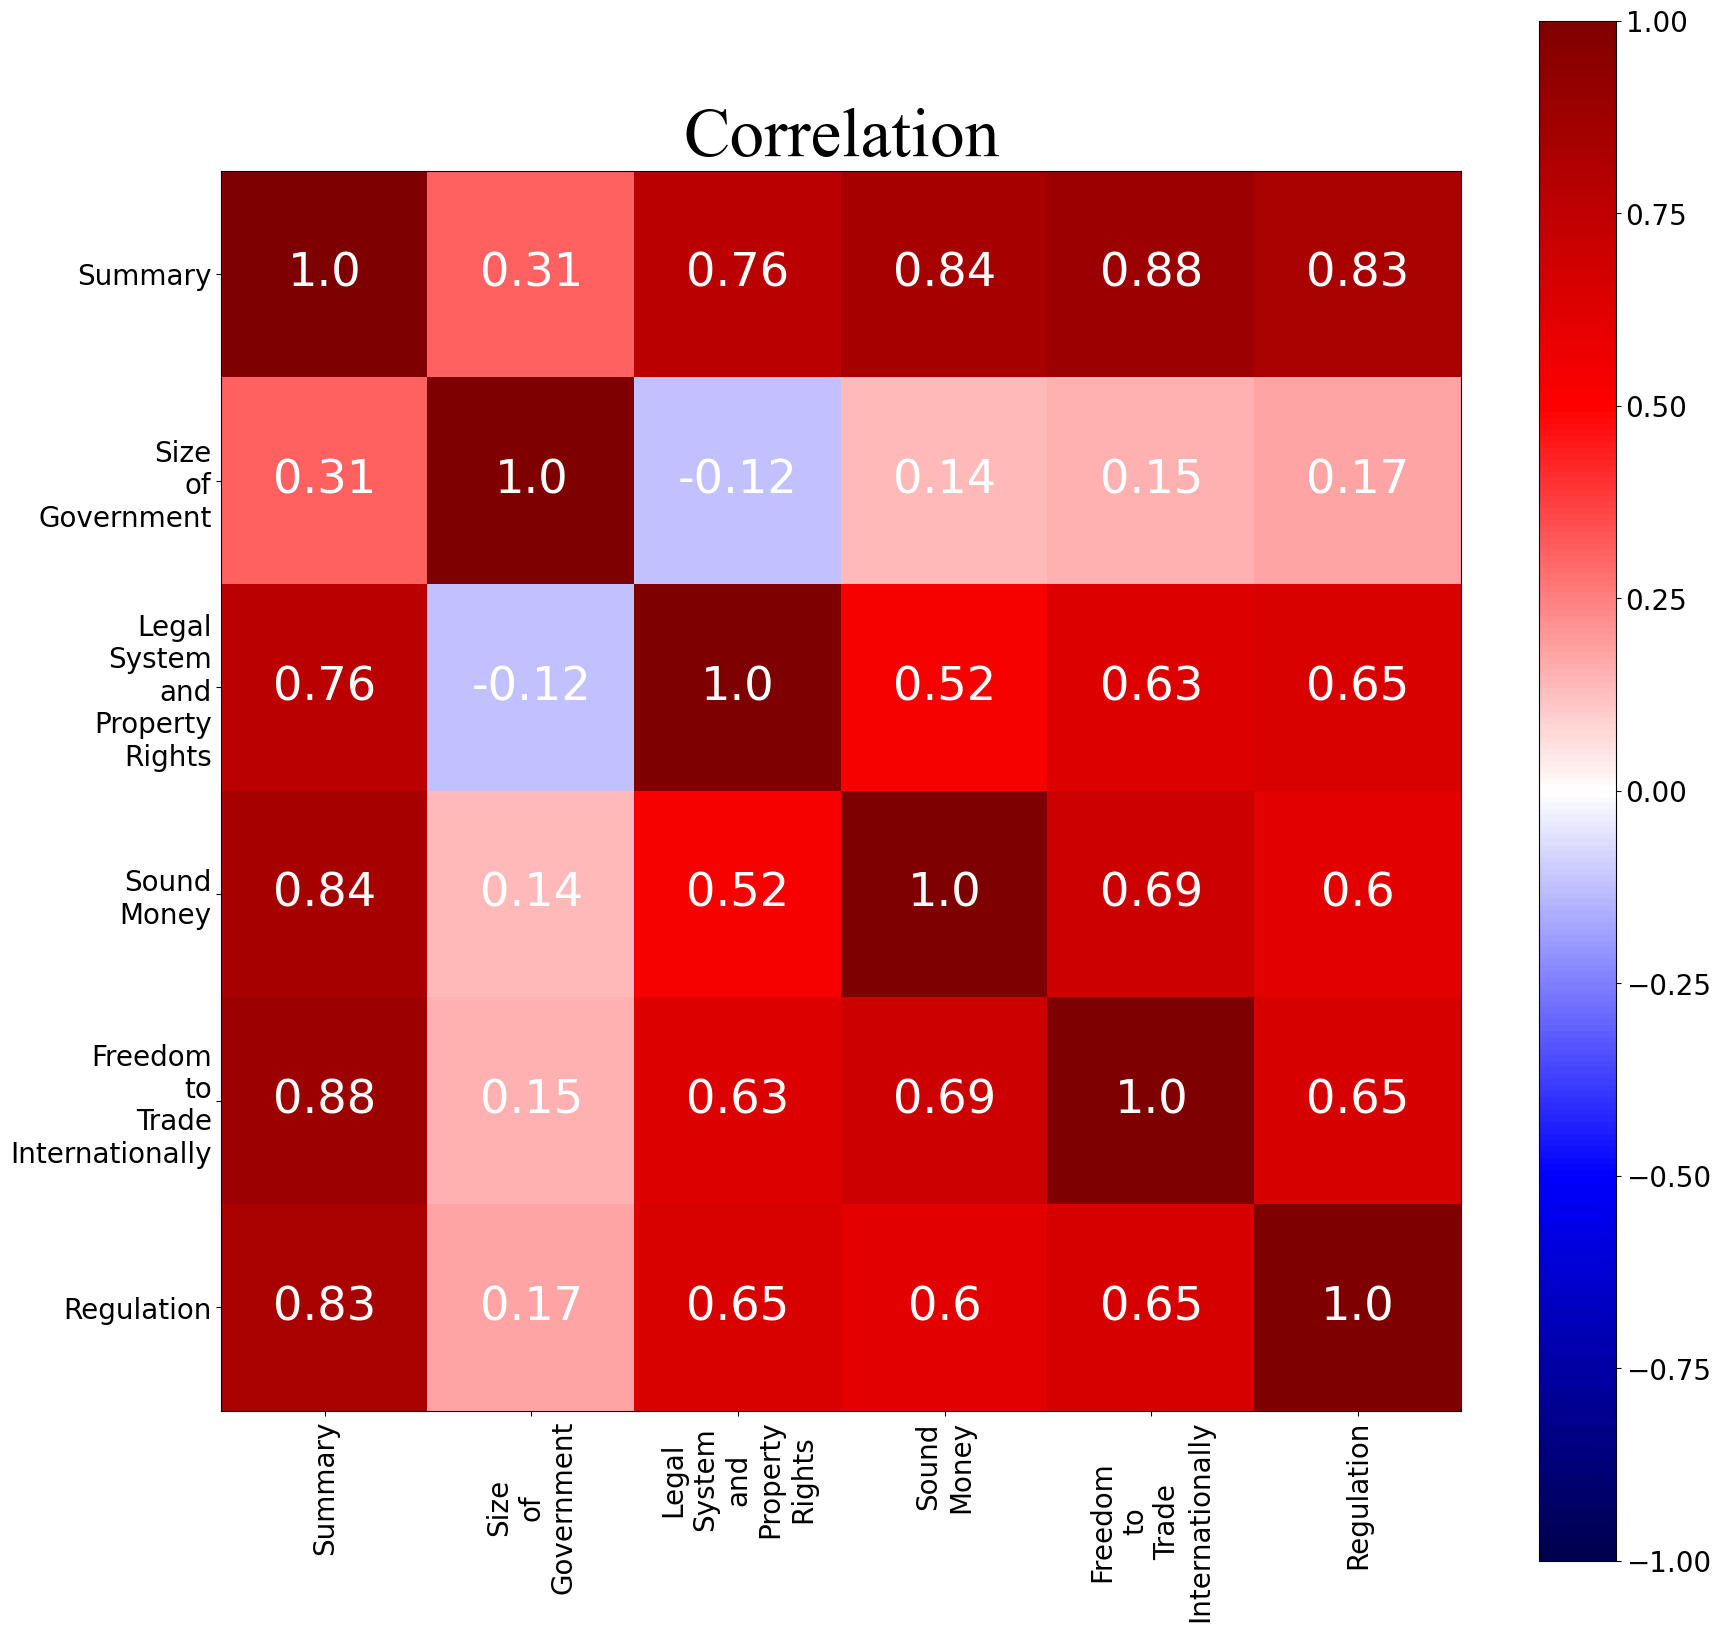

/var/folders/hz/vggy99z9791d4jlzyvlw3r9w0000gn/T/ipykernel_75594/2302198682.py:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bb_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  pp.savefig(fig, bb_inches = "tight")


In [200]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

def corr_matrix_heatmap(data, dim = 20, pp = None):
    fig, ax = plt.subplots(figsize = (dim,dim))
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")
    labels = data.keys()
    num_vars = len(labels)
    tick_labels = [label.replace(" ","\n") for label in labels]
    tick_font_size = 120 / num_vars
    val_font_size = 200 / num_vars
    plt.rcParams.update({'font.size': tick_font_size})
    x_ticks = np.arange(num_vars)
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)
    y_ticks = np.arange(num_vars)
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)
    # put all of the options chosen above to use and create the correlation figure
    for i in range (len(labels)):
        for j in range (len(labels)):
            text = ax.text(i,j,str(round(data.values[i][j], 2)),
                          fontsize = val_font_size, ha = "center",
                          va = "center", color = "w")
    title_font = {"fontname":"Times New Roman"}
    plt.title("Correlation", fontsize = 50, **title_font)
    
    
    cbar = fig.colorbar(im)
    plt.show()
    if pp != None:
        pp.savefig(fig, bb_inches = "tight")
    plt.close()
    
try:
    os.mkdir(folder)
except:
    print(folder, "already exists")
    
# create pdf   
pp = PdfPages(folder + "/Economic Freedom Plots.pdf")    
    
    
corr_data = data.corr()
corr_matrix_heatmap(corr_data, pp = pp)

### building scatter plots with time as horizontal axis

In [162]:
mean_data = data.groupby("Year").mean()
mean_data

Summary  Size of Government  Legal System and Property Rights  \
Year                                                                   
1970  5.895958            6.097432                          5.269616   
1975  5.444773            5.775379                          5.050334   
1980  5.465511            5.561315                          5.084191   
1985  5.496567            5.522270                          5.115000   
1990  5.826704            6.105811                          5.124368   
1995  6.291346            6.500178                          5.393615   
2000  6.600823            6.634801                          5.238790   
2001  6.599041            6.668608                          5.196628   
2002  6.663490            6.662246                          5.185988   
2003  6.681009            6.672367                          5.166744   
2004  6.710922            6.725984                          5.166447   
2005  6.736056            6.854917                          5.293075   
2006  6.780060            6.846312                          5.352180   
2007  6.810935            6.899178                          5.387801   
2008  6.769782            6.852975                          5.374990   
2009  6.774924            6.681671                          5.367239   
2010  6.812107            6.665356                          5.307512   
2011  6.826898            6.712934                          5.311264   
2012  6.835854            6.717951                          5.303486   
2013  6.827952            6.689478                          5.267319   
2014  6.869996            6.679071                          5.311640   
2015  6.868486            6.685504                          5.344179   
2016  6.872591            6.745947                          5.310897   
2017  6.840911            6.714026                          5.323041   
2018  6.888338            6.748693                          5.331769   
2019  6.893302            6.768514                          5.312195   
2020  6.749758            6.603613                          5.360975   

      Sound Money  Freedom to Trade Internationally  Regulation  
Year                                                             
1970     7.296624                          5.321171    5.790808  
1975     5.952210                          4.938716    5.710225  
1980     6.067137                          4.895047    5.770809  
1985     6.142448                          4.979402    5.794253  
1990     6.406462                          5.574780    5.986029  
1995     6.621812                          6.804053    6.192579  
2000     7.600997                          6.984603    6.562829  
2001     7.770338                          6.982832    6.394464  
2002     7.861788                          6.997352    6.621917  
2003     7.880149                          7.047378    6.649483  
2004     7.951051                          6.992921    6.722156  
2005     7.864794                          6.883771    6.782237  
2006     7.894100                          6.940902    6.864784  
2007     7.922043                          6.981182    6.866936  
2008     7.764033                          7.023490    6.834730  
2009     7.930318                          7.020073    6.878410  
2010     8.033986                          7.032564    7.021090  
2011     8.057384                          7.021954    7.029696  
2012     8.137003                          6.986931    7.030707  
2013     8.205091                          6.965516    7.010689  
2014     8.286492                          7.050601    7.018232  
2015     8.277932                          7.024002    7.006872  
2016     8.315198                          7.002284    6.986641  
2017     8.280965                          6.994231    6.892610  
2018     8.345674                          7.012747    7.005562  
2019     8.328343                          7.030791    7.029122  
2020     8.242351                          6.615388    6.927039

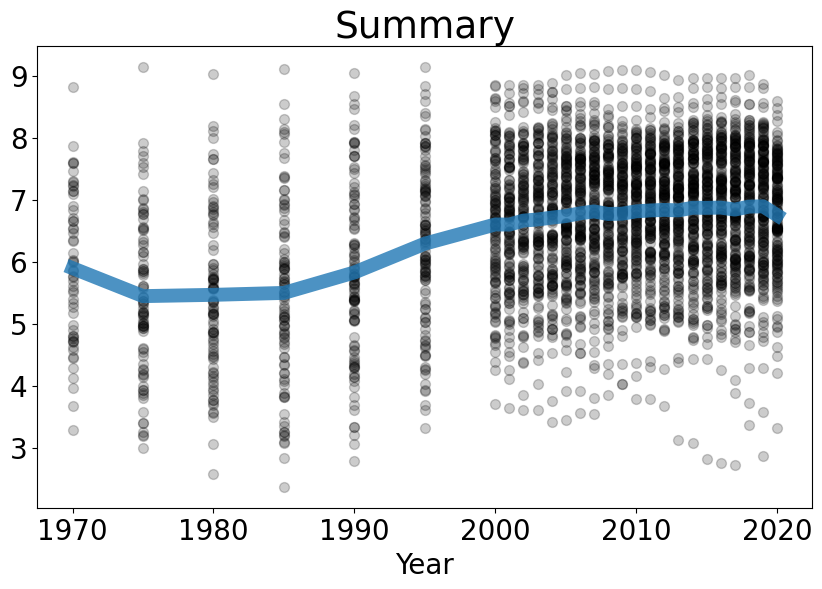

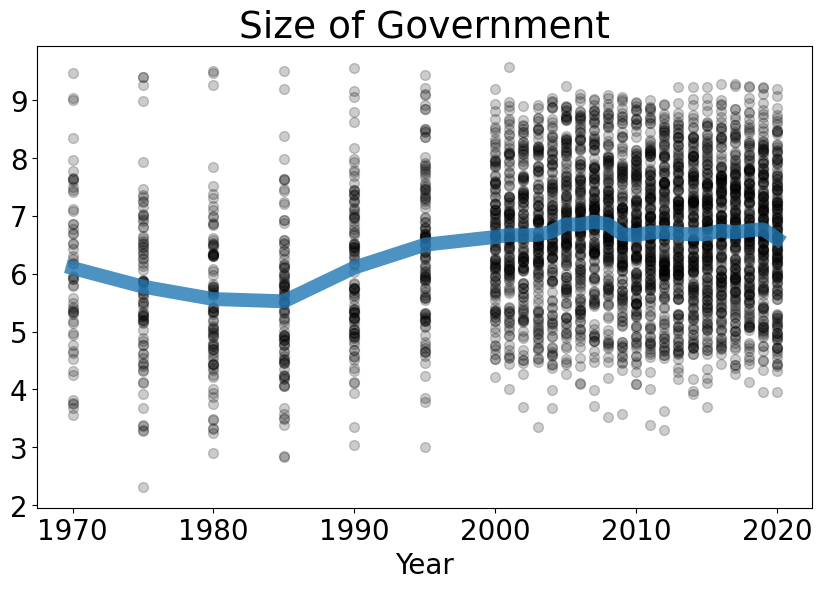

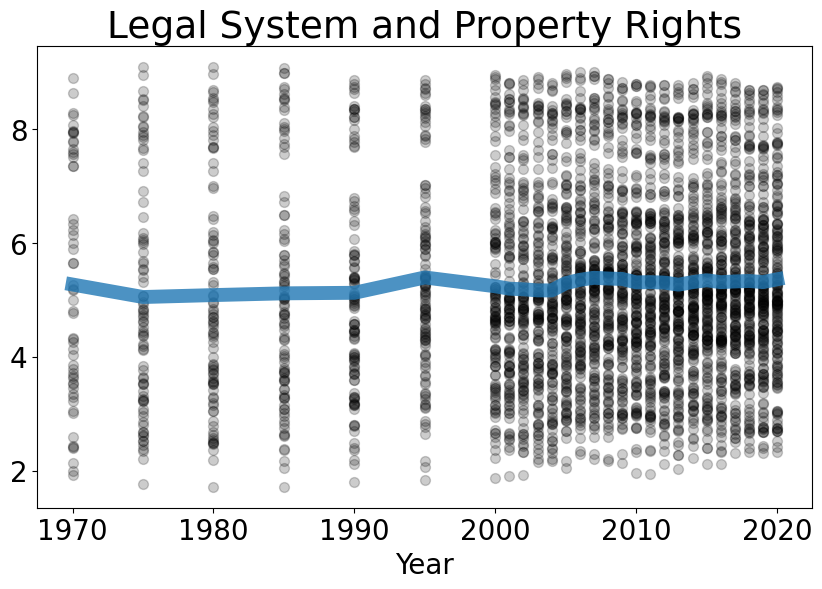

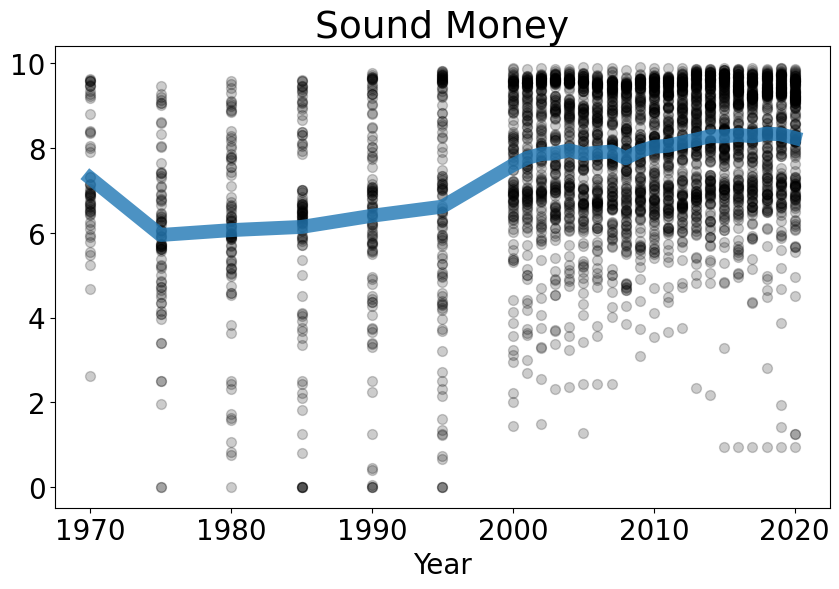

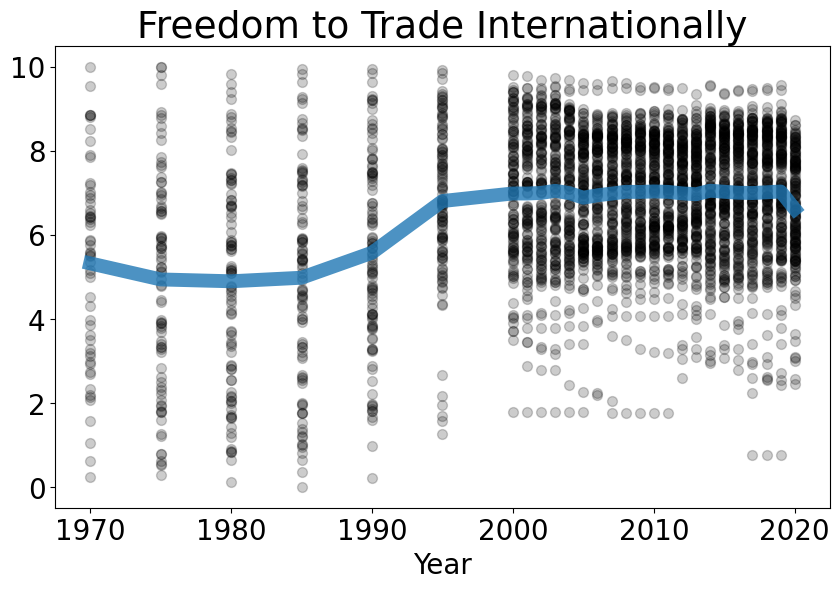

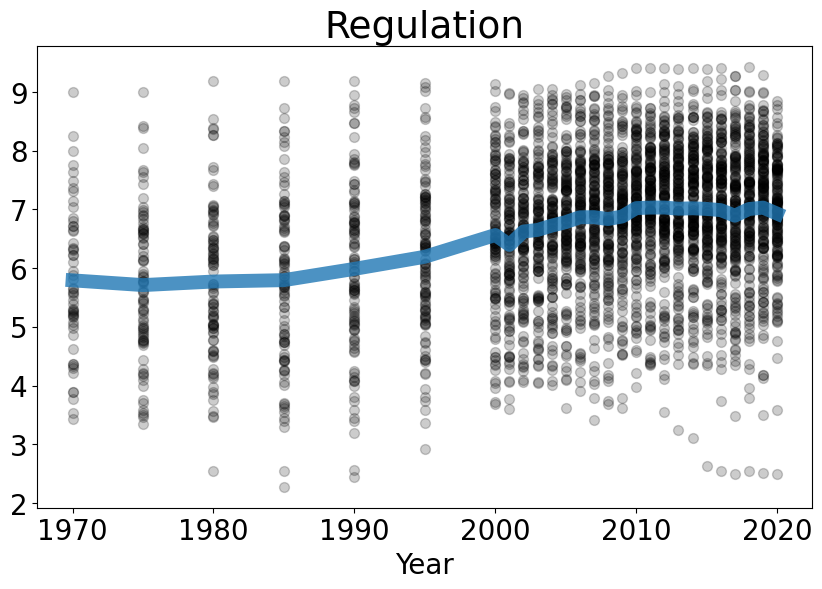

In [205]:
plt.rcParams.update({'font.size': 20})

def plot_ts_scatter(data, pp = None):
    time = data.index.get_level_values("Year")
    for key, val in data.items():
        fig, ax = plt.subplots(figsize = (10,6))
        ax.scatter(time, val, alpha = .2, color = "k", s = 50)
        ax.set_title(key, fontsize = 27)
        mean_data[key].plot(ax = ax, linewidth = 10, color = "C0", alpha = .8)
        plt.show()
        plt.savefig(folder + "/" + key + ".jpeg")
        if pp != None:
            pp.savefig(fig, bbox_inches = "tight")
        plt.close()
        
plot_ts_scatter(data,pp)

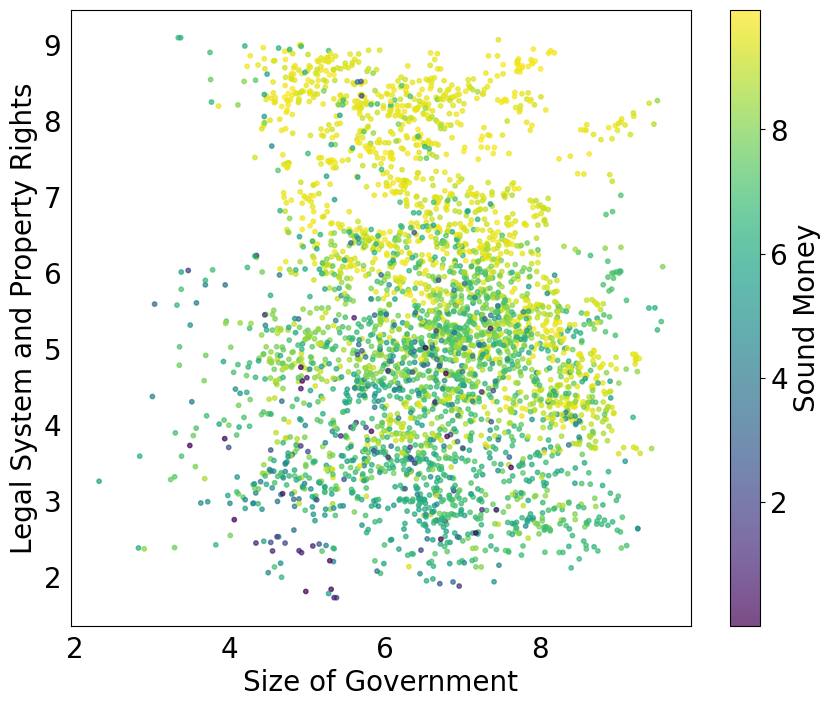

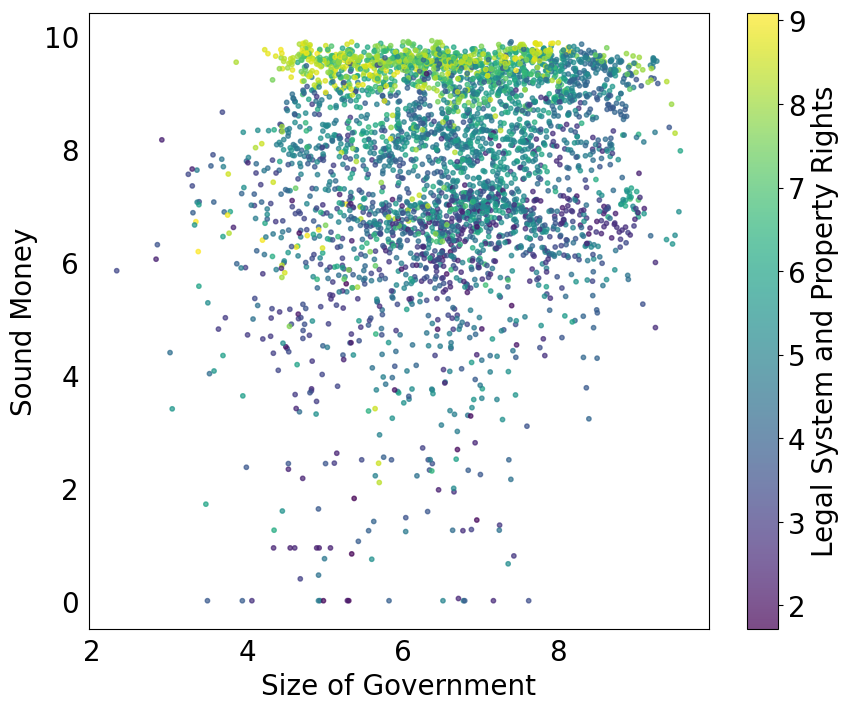

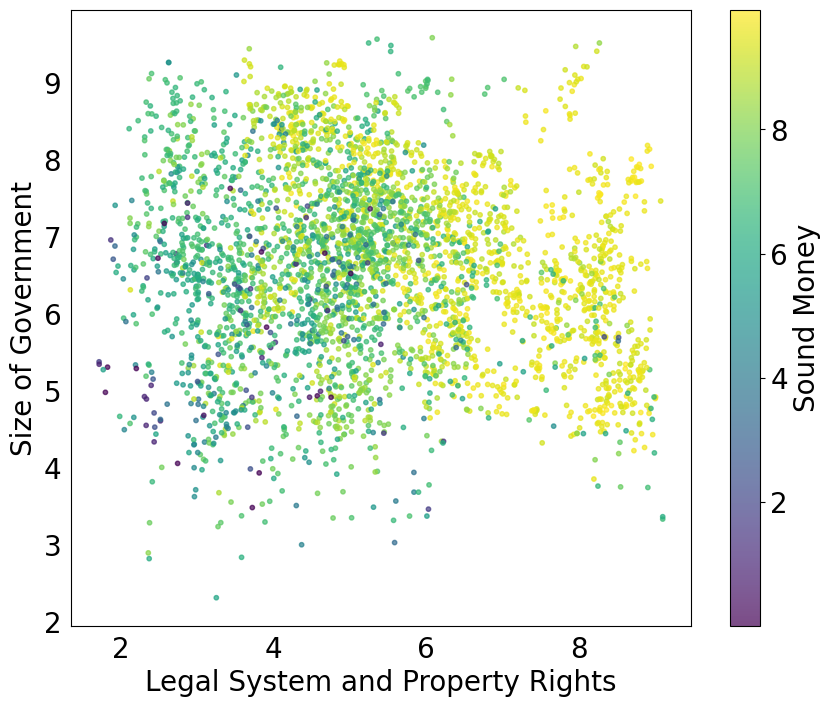

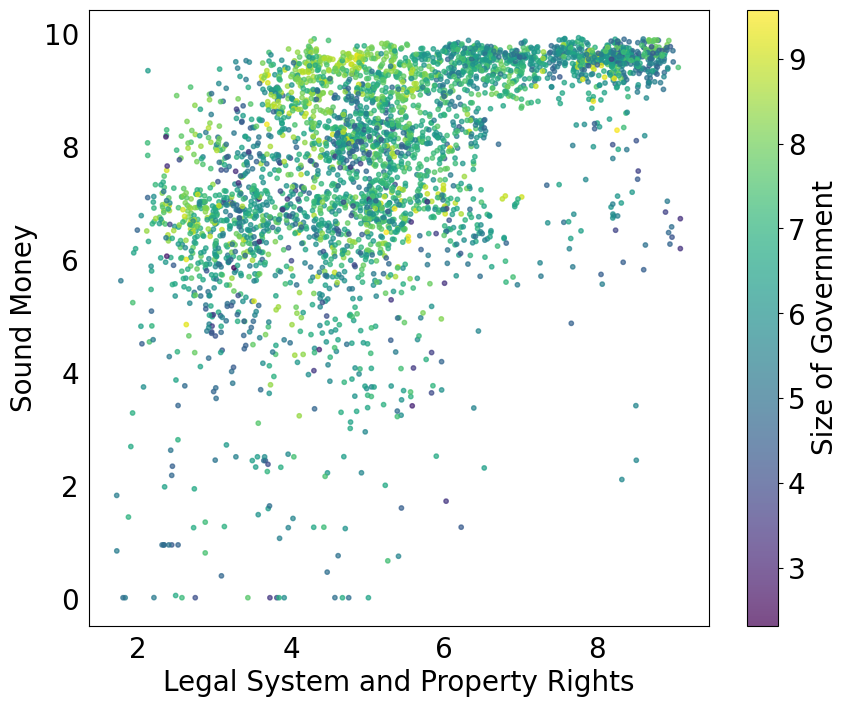

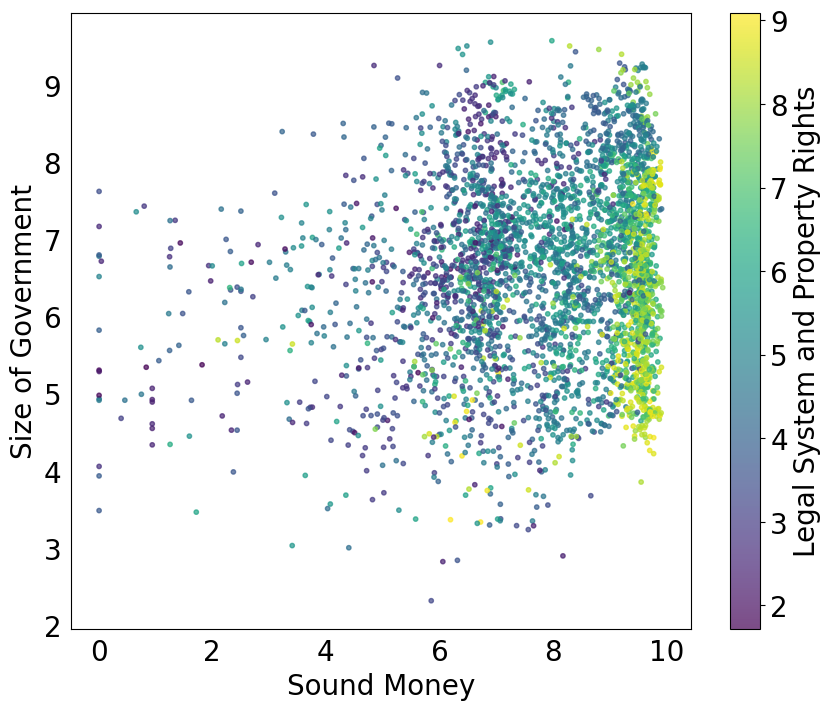

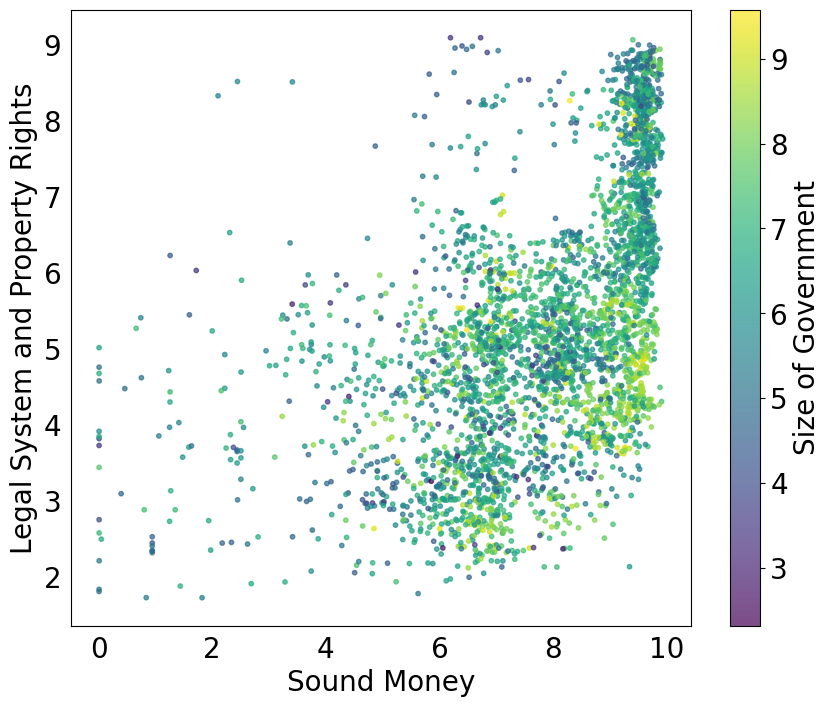

In [206]:

#create a pdf
def color_dim_scatter(data, pp):
    for key1 in data:
        for key2 in data:
            # don't plot the same variable on x and y
            if key1 != key2:
                for key3 in data:
                    # don't plot the same variable for c,x, and y
                    if key1 != key3 and key2 != key3:
                        fix, ax = plt.subplots(figsize = (10,8))
                        data.plot.scatter(x = key1,
                                          y = key2,
                                          c = key3,
                                          colormap = "viridis",
                                          s = 10,
                                          alpha = .7,
                                          ax = ax)
                    # remove the ticklines
                        plt.setp(ax.get_xticklines(), visible = False)
                        plt.setp(ax.get_yticklines(), visible = False)
                    
                    #show figure
                        plt.show()
                    
                    #save the figure we showed
                        pp.savefig(fig, bbox_inches = "tight")
                    
                    #close the figure
                        plt.close

color_dim_scatter(data[["Size of Government","Legal System and Property Rights", "Sound Money"]], pp)
# close the pdf so that it can be opened
pp.close()
        

In [207]:
folder

'Project 5 Plots'

/var/folders/hz/vggy99z9791d4jlzyvlw3r9w0000gn/T/ipykernel_75594/475313193.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(data,


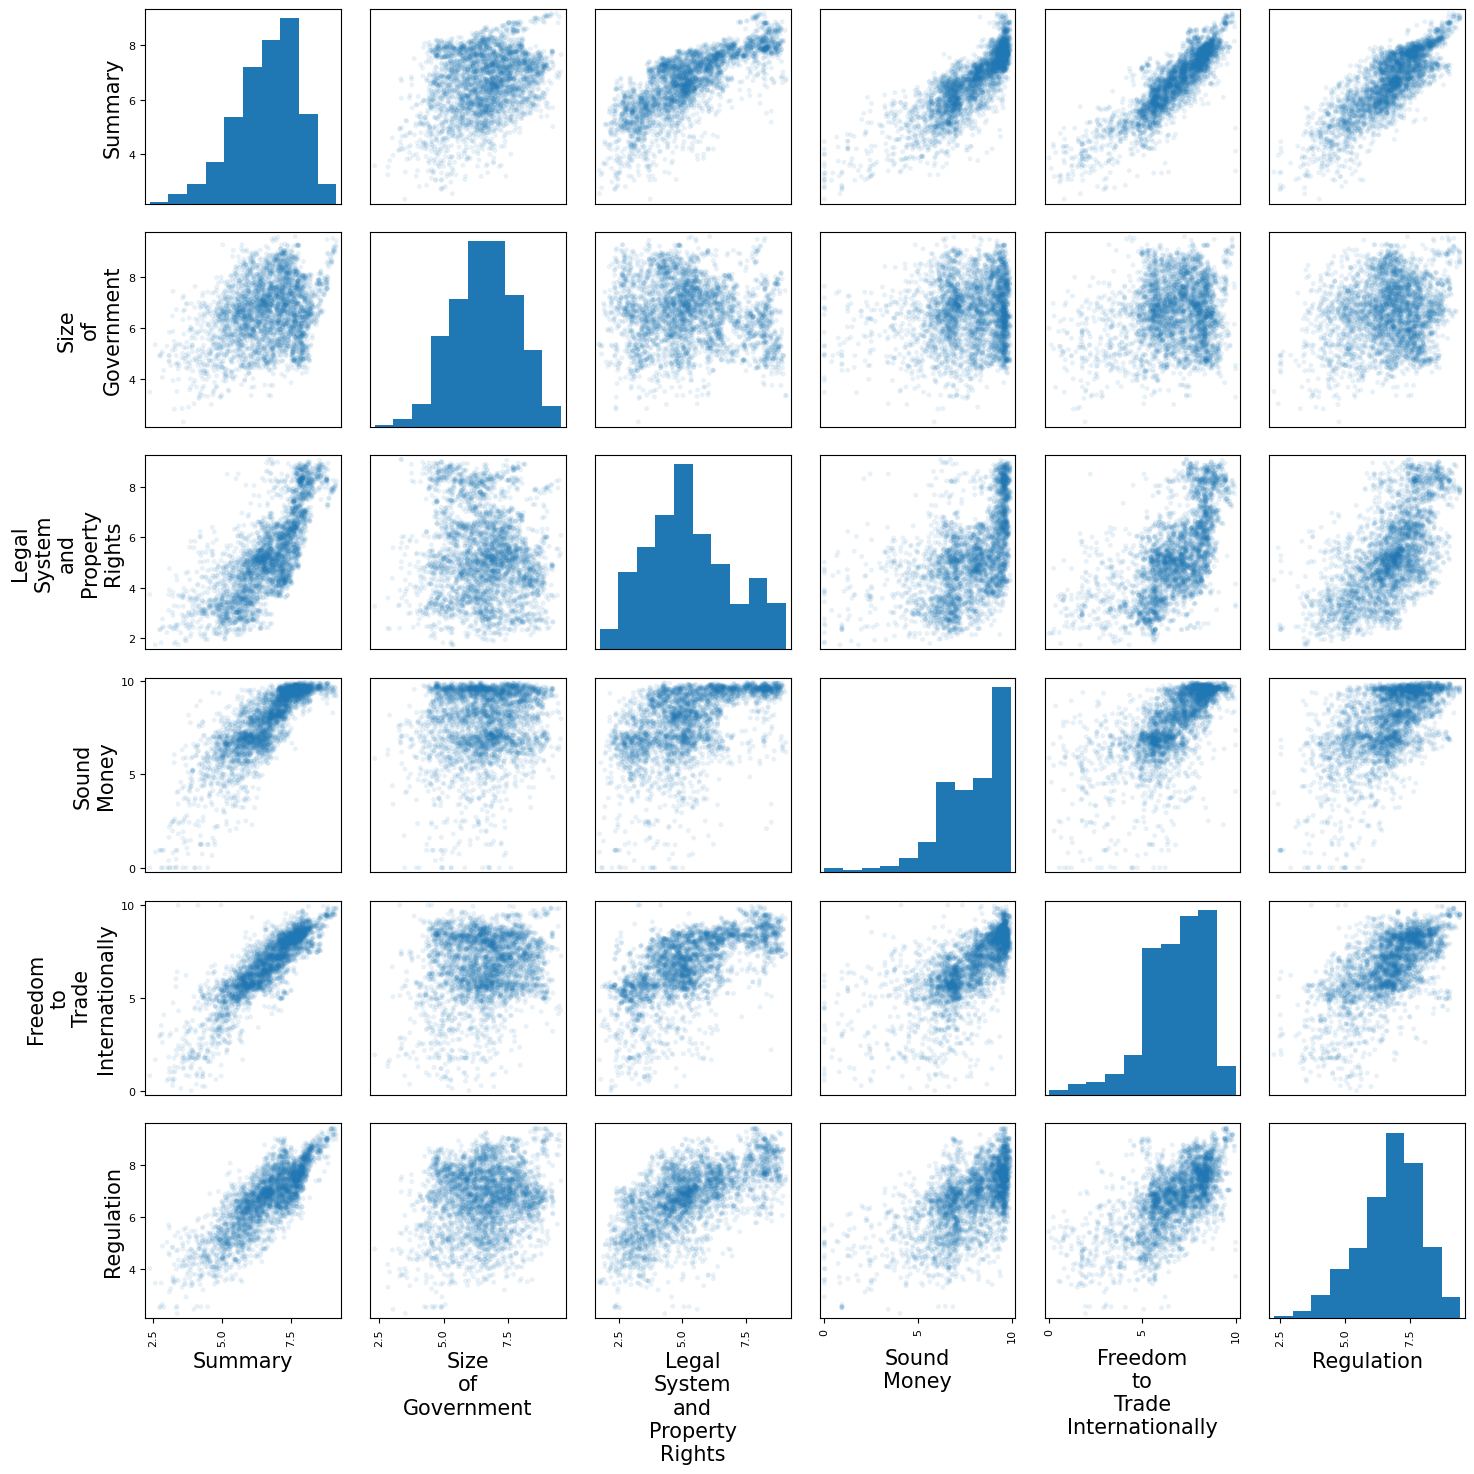

AttributeError: 'NoneType' object has no attribute 'endStream'

In [224]:
def formatted_scatter_matrix(data, pp = None, dim = 15):
    figsize = (dim, dim)
    num_vars = len(data.keys())
    font_size = 90 / num_vars
    fig, ax = plt.subplots(figsize = figsize)
    pd.plotting.scatter_matrix(data,
                               alpha = .1,
                               ax = ax,
                               # s means size
                               s = 300 / num_vars)
    plt.rcParams.update({'font.size': font_size})
    plt.tight_layout()
    plt.show()
    if pp != None:
        # bbox_inches helps keep the figure from being cut off
        pp.savefig(fig, bbox_inches = "tight")
    plt.close()


plot_data = data.rename(
    columns = {key:key.replace(" ", "\n") for key in data.keys()})
formatted_scatter_matrix(plot_data, pp, dim = 15)

# closes the pdf so it can be opened without corrupting
pp.close()